In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import folium
import dash

In [2]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA

In [3]:
df=pd.read_excel("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/airlines_data.xlsx")
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
df.shape

(10683, 11)

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
df=df.fillna(method='ffill')

/tmp/ipykernel_15509/1718901248.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill')


In [9]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
print(df['Airline'].unique().tolist())
print(df['Airline'].nunique())

['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet']
12


In [11]:
df['Airline']=np.where(df['Airline']=='Vistara Premium economy','Vistara',df['Airline'])
df['Airline']=np.where(df['Airline']=='Jet Airways Business','Jet Airways',df['Airline'])

In [12]:
df['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Multiple carriers Premium economy',
 'Trujet']

In [13]:
df['Airline'].nunique()

10

In [14]:
df['Airline']=np.where(df['Airline']=="Multiple carriers","Multiple carriers Premium economy",df['Airline'])

In [15]:
df['Airline'].nunique()

9

In [16]:
df1=pd.get_dummies(data=df,columns=['Airline','Source','Destination'])
df1.head(10)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,False,True,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,False,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,False,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,False,False,...,False,False,False,False,False,False,False,False,False,True
5,24/06/2019,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,False,False,...,False,False,True,False,True,False,False,False,False,False
6,12/03/2019,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,False,False,...,False,False,False,False,False,False,False,False,False,True
7,01/03/2019,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,False,False,...,False,False,False,False,False,False,False,False,False,True
8,12/03/2019,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,False,False,...,False,False,False,False,False,False,False,False,False,True
9,27/05/2019,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,False,False,...,False,True,False,False,False,True,False,False,False,False


In [17]:
df.shape

(10683, 11)

In [18]:
df1.shape

(10683, 28)

In [19]:
print(df['Source'].unique().tolist())
print(df['Destination'].unique().tolist())

['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']


In [20]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [21]:
df1.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df1.head(10)

/tmp/ipykernel_15509/1843219151.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,False,False,False,False,False,False,False,True
5,24/06/2019,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873,False,False,...,False,False,True,False,True,False,False,False,False,False
6,12/03/2019,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,False,False,...,False,False,False,False,False,False,False,False,False,True
7,01/03/2019,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270,False,False,...,False,False,False,False,False,False,False,False,False,True
8,12/03/2019,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,False,False,...,False,False,False,False,False,False,False,False,False,True
9,27/05/2019,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625,False,False,...,False,True,False,False,False,True,False,False,False,False


In [22]:
duration = list(df1['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     
 
df1['Duration_hours'] = dur_hours
df1['Duration_minutes'] =dur_minutes
df1.loc[:,'Duration_hours'] *= 60
df1['Duration_Total_mins']= df1['Duration_hours']+df1['Duration_minutes']

In [23]:
df1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,False,False,False,False,True,120,50,170
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,True,False,False,False,False,False,420,25,445
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,False,True,False,False,False,False,1140,0,1140
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,True,False,False,False,False,False,300,25,325
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,False,False,False,False,True,240,45,285


In [24]:
df1['Dep_Hour']=pd.to_datetime(df1['Dep_Time']).dt.hour
df1['Dep_Min']=pd.to_datetime(df1['Dep_Time']).dt.minute

/tmp/ipykernel_15509/831853492.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Dep_Hour']=pd.to_datetime(df1['Dep_Time']).dt.hour
/tmp/ipykernel_15509/831853492.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Dep_Min']=pd.to_datetime(df1['Dep_Time']).dt.minute


In [25]:
df1.head(5)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,False,False,True,120,50,170,22,20
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,False,False,False,False,420,25,445,5,50
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,True,False,False,False,False,1140,0,1140,9,25
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,False,False,False,False,300,25,325,18,5
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,False,False,True,240,45,285,16,50


In [26]:
df1["Arrival_Hour"]= pd.to_datetime(df1['Arrival_Time']).dt.hour
df1["Arrival_Min"]= pd.to_datetime(df1['Arrival_Time']).dt.minute

/tmp/ipykernel_15509/4141143842.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["Arrival_Hour"]= pd.to_datetime(df1['Arrival_Time']).dt.hour
/tmp/ipykernel_15509/4141143842.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1["Arrival_Min"]= pd.to_datetime(df1['Arrival_Time']).dt.minute


In [27]:
df1['Dep_timezone']=pd.cut(df1['Dep_Hour'],[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])

In [28]:
df1.head(5)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Dep_timezone
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,True,120,50,170,22,20,1,10,Evening
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,False,420,25,445,5,50,13,15,Night
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,False,1140,0,1140,9,25,4,25,Morning
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,False,300,25,325,18,5,23,30,Afternoon
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,True,240,45,285,16,50,21,35,Afternoon


In [29]:
df1['Arrival_timezone']=pd.cut(df1['Arrival_Hour'],[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
df1.head(5)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Dep_timezone,Arrival_timezone
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,True,120,50,170,22,20,1,10,Evening,Night
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,420,25,445,5,50,13,15,Night,Afternoon
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,1140,0,1140,9,25,4,25,Morning,Night
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,300,25,325,18,5,23,30,Afternoon,Evening
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,True,240,45,285,16,50,21,35,Afternoon,Evening


In [30]:
df1['Month']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.month
df1.head(5)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Dep_timezone,Arrival_timezone,Month
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,120,50,170,22,20,1,10,Evening,Night,3
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,420,25,445,5,50,13,15,Night,Afternoon,5
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,1140,0,1140,9,25,4,25,Morning,Night,6
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,300,25,325,18,5,23,30,Afternoon,Evening,5
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,240,45,285,16,50,21,35,Afternoon,Evening,3


In [31]:
df1['Day']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.day
df1['Year']=pd.to_datetime(df1['Date_of_Journey'],format="%d/%m/%Y").dt.year

In [32]:
df1.head(5)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Duration_Total_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Dep_timezone,Arrival_timezone,Month,Day,Year
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,170,22,20,1,10,Evening,Night,3,24,2019
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,445,5,50,13,15,Night,Afternoon,5,1,2019
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,1140,9,25,4,25,Morning,Night,6,9,2019
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,325,18,5,23,30,Afternoon,Evening,5,12,2019
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,285,16,50,21,35,Afternoon,Evening,3,1,2019


In [33]:
df1['day_of_week']=pd.to_datetime(df1['Date_of_Journey']).dt.day_name()
df1.head(5)

/tmp/ipykernel_15509/4174862320.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['day_of_week']=pd.to_datetime(df1['Date_of_Journey']).dt.day_name()


,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Dep_timezone,Arrival_timezone,Month,Day,Year,day_of_week
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,22,20,1,10,Evening,Night,3,24,2019,Sunday
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,5,50,13,15,Night,Afternoon,5,1,2019,Wednesday
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,9,25,4,25,Morning,Night,6,9,2019,Sunday
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,18,5,23,30,Afternoon,Evening,5,12,2019,Sunday
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,16,50,21,35,Afternoon,Evening,3,1,2019,Friday


In [34]:
df1.columns.tolist()

['Date_of_Journey',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Airline_Air Asia',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Source_Banglore',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Banglore',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi',
 'Duration_hours',
 'Duration_minutes',
 'Duration_Total_mins',
 'Dep_Hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min',
 'Dep_timezone',
 'Arrival_timezone',
 'Month',
 'Day',
 'Year',
 'day_of_week']

In [37]:
new_data = df1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Price']]

<Axes: >

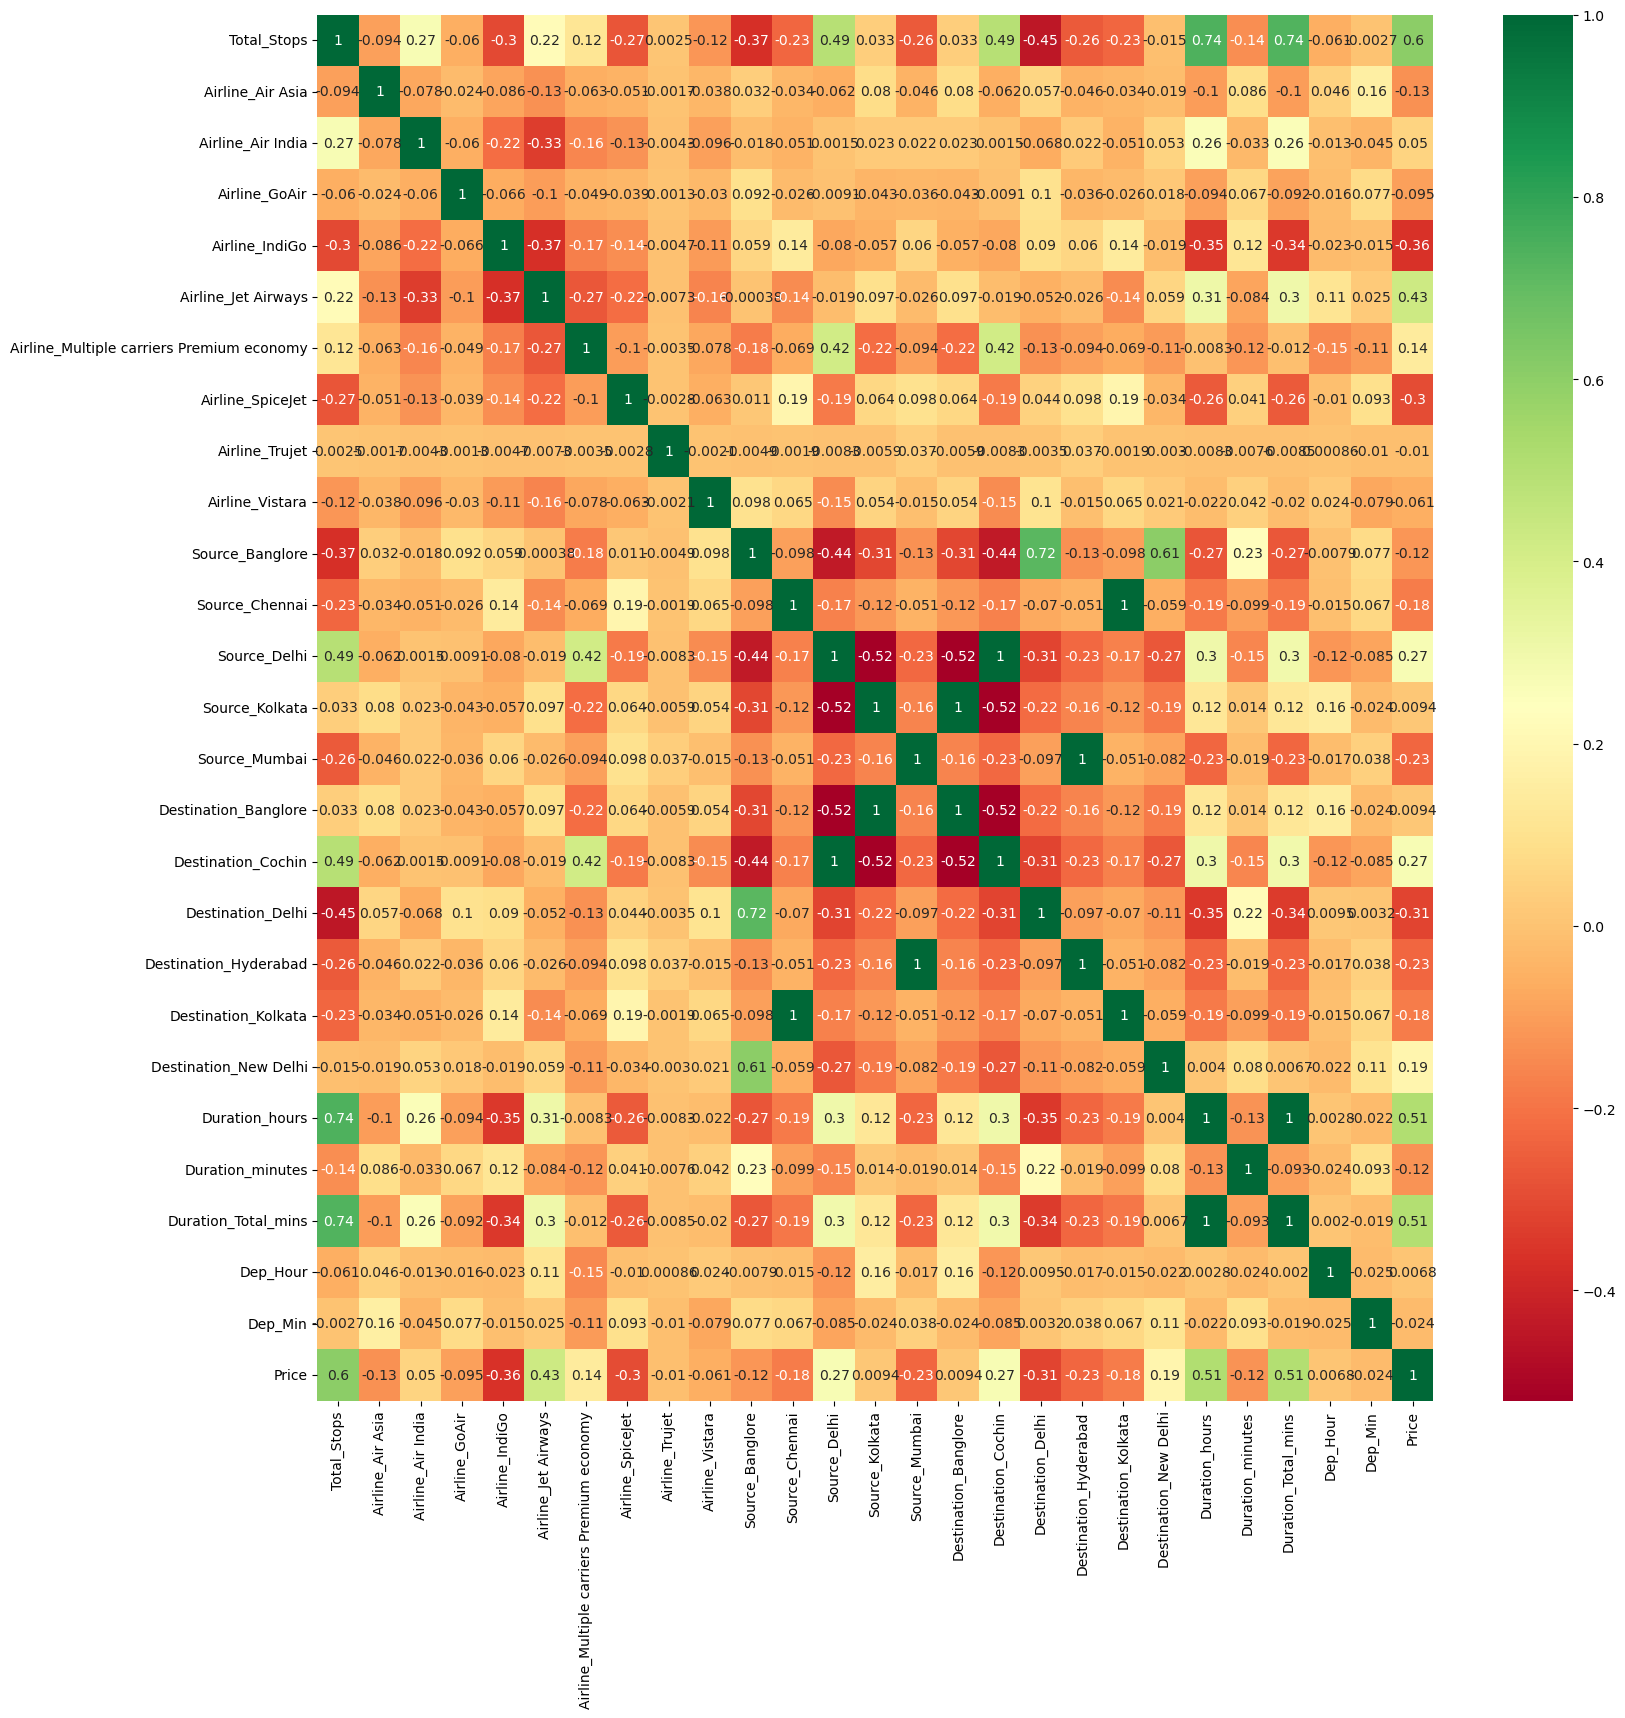

In [38]:
plt.figure(figsize=(18,18))
sns.heatmap(new_data.corr(),annot=True,cmap="RdYlGn")

In [39]:
features=new_data.corr()['Price'].sort_values()
features

Airline_IndiGo                              -0.361048
Destination_Delhi                           -0.313401
Airline_SpiceJet                            -0.296552
Source_Mumbai                               -0.230745
Destination_Hyderabad                       -0.230745
Destination_Kolkata                         -0.179216
Source_Chennai                              -0.179216
Airline_Air Asia                            -0.133044
Duration_minutes                            -0.124874
Source_Banglore                             -0.118026
Airline_GoAir                               -0.095146
Airline_Vistara                             -0.060503
Dep_Min                                     -0.024492
Airline_Trujet                              -0.010380
Dep_Hour                                     0.006819
Source_Kolkata                               0.009377
Destination_Banglore                         0.009377
Airline_Air India                            0.050346
Airline_Multiple carriers Pr

In [41]:
x = df1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min']]

In [46]:
y=df1['Price']
ss=StandardScaler()
x=ss.fit_transform(x.astype(np.float64))
x.shape

(10683, 26)

In [45]:
pca=PCA(n_components=2)
pca.fit_transform(x)

array([[-2.87559235, -0.55520415],
       [ 0.31882945,  2.39235354],
       [ 3.05931822, -0.52686459],
       ...,
       [-2.24752702, -0.58854579],
       [-2.69895755, -0.28856263],
       [ 1.92548188, -1.10426513]], shape=(10683, 2))

In [47]:
explained_ratio=pca.explained_variance_ratio_
explained_ratio

array([0.17545521, 0.12110719])

In [51]:
pca1=PCA(n_components=7)
pca1.fit_transform(x)

array([[-2.87559235, -0.55520415,  2.28555147, ...,  0.52660495,
        -0.38554749, -0.30610281],
       [ 0.31882945,  2.39235354, -0.59509343, ..., -0.03828948,
        -2.31295633,  1.20758846],
       [ 3.05931822, -0.52686459, -0.01582784, ...,  0.83850662,
         1.33002085, -0.15296871],
       ...,
       [-2.24752702, -0.58854579,  2.08260251, ...,  0.13843889,
         1.53349486, -1.18963693],
       [-2.69895755, -0.28856263,  2.56573449, ...,  1.21394608,
        -0.90216631, -1.34527105],
       [ 1.92548188, -1.10426513, -0.10391506, ...,  0.53255773,
        -1.6920177 ,  1.3335007 ]], shape=(10683, 7))

In [52]:
er1=pca1.explained_variance_ratio_
er1

array([0.17545521, 0.12110719, 0.0926492 , 0.08280111, 0.06739565,
       0.05275645, 0.04819544])

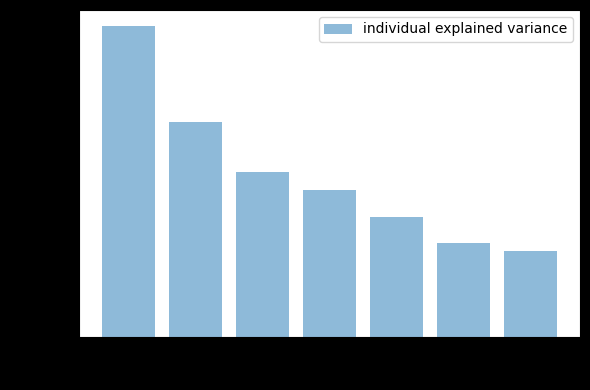

In [53]:
# use proper indentation with this block of code

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))


plt.bar(range(7), er1, alpha=0.5, align='center',
label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout() 


In [57]:
pca = PCA()
pca.fit(x)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
d

np.int64(16)

In [59]:
pca=PCA(n_components=0.95)
x_reduced=pca.fit_transform(x)
x_reduced

array([[-2.87559235, -0.55520415,  2.28555147, ...,  2.18750011,
        -0.70745116,  0.06324468],
       [ 0.31882945,  2.39235354, -0.59509343, ..., -1.21543437,
         1.05186859,  0.49121596],
       [ 3.05931822, -0.52686459, -0.01582784, ..., -0.82295224,
         0.85188159, -0.92235252],
       ...,
       [-2.24752702, -0.58854579,  2.08260251, ..., -2.44646124,
         1.0653453 , -0.10135635],
       [-2.69895755, -0.28856263,  2.56573449, ...,  1.99195118,
         0.71054376, -0.9266815 ],
       [ 1.92548188, -1.10426513, -0.10391506, ..., -0.13907595,
         1.44700886,  0.02491626]], shape=(10683, 16))

In [60]:
px.area(
    x=range(1, cumsum.shape[0] + 1),
    y=cumsum,
    labels={"x": "# Components", "y": "Explained Variance"}
)